In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acovf, acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Zadanie 1


In [2]:
df1 = pd.read_csv("archiwum_tab_a_2025.csv", encoding='Latin2', sep=';')

In [3]:
df2 = pd.read_csv("archiwum_tab_a_2024.csv", encoding='Latin2', sep=';')

In [4]:
df = pd.read_csv("archiwum_tab_a_2024.csv", encoding='Latin2', sep=';')

In [5]:
df = df.iloc[1:-3]

In [6]:
df2 = df2.iloc[1:-3]
df1 = df1.iloc[1:-3]

In [22]:
df = pd.concat([df2, df1])

In [7]:
df

,data,1THB,1USD,1AUD,1HKD,1CAD,1NZD,1SGD,1EUR,100HUF,...,1BRL,1MYR,10000IDR,100INR,100KRW,1CNY,1XDR,nr tabeli,pełny numer tabeli,Unnamed: 36
1,20240102,"0,1155","3,9432","2,6897","0,5046","2,9752","2,4884","2,9809","4,3434","1,1365",...,"0,8125","0,8567","2,5489","4,7327","0,3032","0,5525","5,2882",1.0,001/A/NBP/2024,NaN
2,20240103,"0,1162","3,9909","2,6932","0,5112","2,9947","2,4961","3,0074","4,3646","1,1462",...,"0,8105","0,8618","2,5781","4,7914","0,3050","0,5585","5,3351",2.0,002/A/NBP/2024,NaN
3,20240104,"0,1152","3,9684","2,6760","0,5083","2,9785","2,4849","2,9900","4,3525","1,1468",...,"0,8065","0,8563","2,5619","4,7676","0,3036","0,5552","5,3260",3.0,003/A/NBP/2024,NaN
4,20240105,"0,1148","3,9850","2,6627","0,5101","2,9797","2,4778","2,9925","4,3484","1,1498",...,"0,8136","0,8562","2,5682","4,7907","0,3023","0,5569","5,3070",4.0,004/A/NBP/2024,NaN
5,20240108,"0,1137","3,9812","2,6668","0,5099","2,9761","2,4819","2,9922","4,3548","1,1528",...,"0,8167","0,8560","2,5644","4,7886","0,3020","0,5559","5,3215",5.0,005/A/NBP/2024,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,20241223,"0,1197","4,0950","2,5629","0,5271","2,8475","2,3167","3,0209","4,2621","1,0278",...,"0,6735","0,9120","2,5317","4,8113","0,2821","0,5610","5,3493",248.0,248/A/NBP/2024,NaN
249,20241224,"0,1204","4,1127","2,5647","0,5295","2,8571","2,3194","3,0256","4,2739","1,0364",...,"0,6639","0,9166","2,5403","4,8273","0,2817","0,5635","5,3630",249.0,249/A/NBP/2024,NaN
250,20241227,"0,1203","4,1036","2,5483","0,5287","2,8492","2,3092","3,0166","4,2747","1,0401",...,"0,6639","0,9177","2,5276","4,7968","0,2779","0,5622","5,3640",250.0,250/A/NBP/2024,NaN
251,20241230,"0,1201","4,0960","2,5494","0,5278","2,8464","2,3157","3,0177","4,2738","1,0392",...,"0,6610","0,9170","2,5386","4,7888","0,2778","0,5611","5,3629",251.0,251/A/NBP/2024,NaN


In [8]:
df = df[["data", "1USD", "1EUR", "1GBP"]]

In [9]:
df.columns = ["date", "USD", "EUR", "GBP"]

In [10]:
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")


C:\Users\rafal\AppData\Local\Temp\ipykernel_32508\2752413111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")


In [11]:
df["date"].isna().sum()

np.int64(0)

In [12]:
df["USD"] = df["USD"].str.replace(",", ".").astype(float)
df["EUR"] = df["EUR"].str.replace(",", ".").astype(float)
df["GBP"] = df["GBP"].str.replace(",", ".").astype(float)

C:\Users\rafal\AppData\Local\Temp\ipykernel_32508\860319475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["USD"] = df["USD"].str.replace(",", ".").astype(float)
C:\Users\rafal\AppData\Local\Temp\ipykernel_32508\860319475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EUR"] = df["EUR"].str.replace(",", ".").astype(float)
C:\Users\rafal\AppData\Local\Temp\ipykernel_32508\860319475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [13]:
df = df.reset_index(drop=True)
df.index = df.index + 1

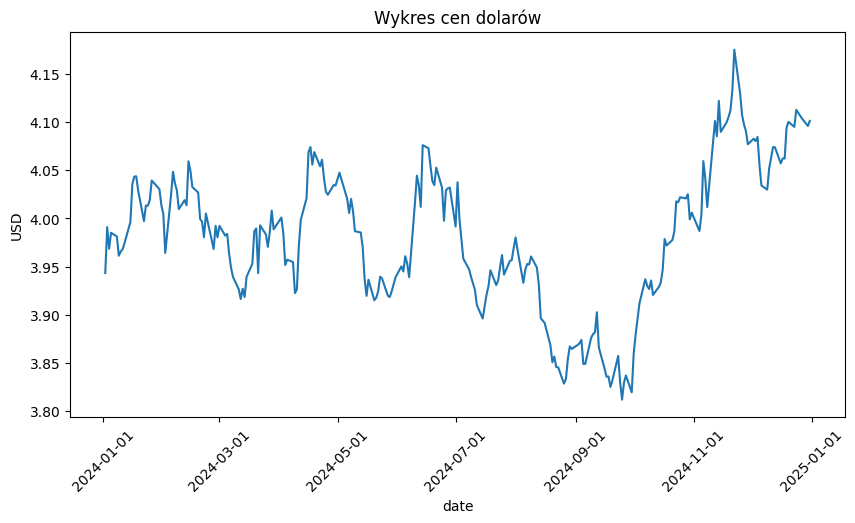

In [14]:
import matplotlib.dates as mdates
plt.figure(figsize=(10, 5))
sns.lineplot(x="date", y="USD", data=df)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres cen dolarów")
plt.show()

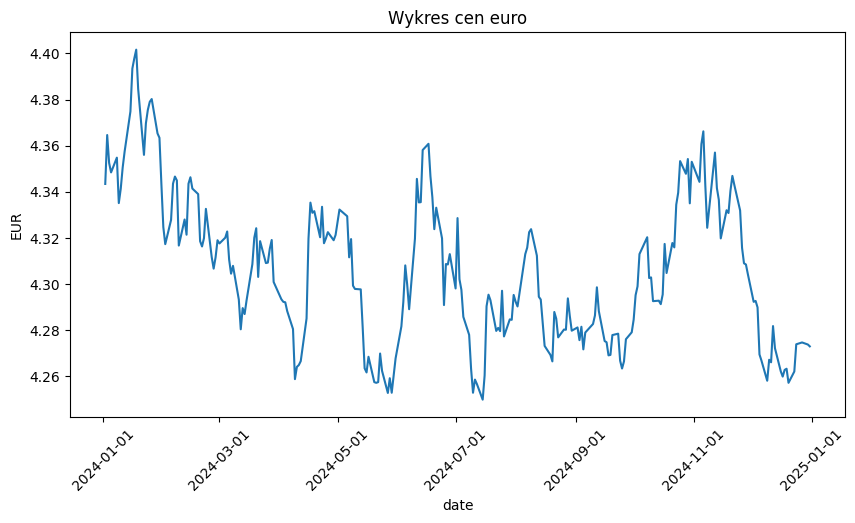

In [15]:
import matplotlib.dates as mdates
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="date", y="EUR")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres cen euro")
plt.show()

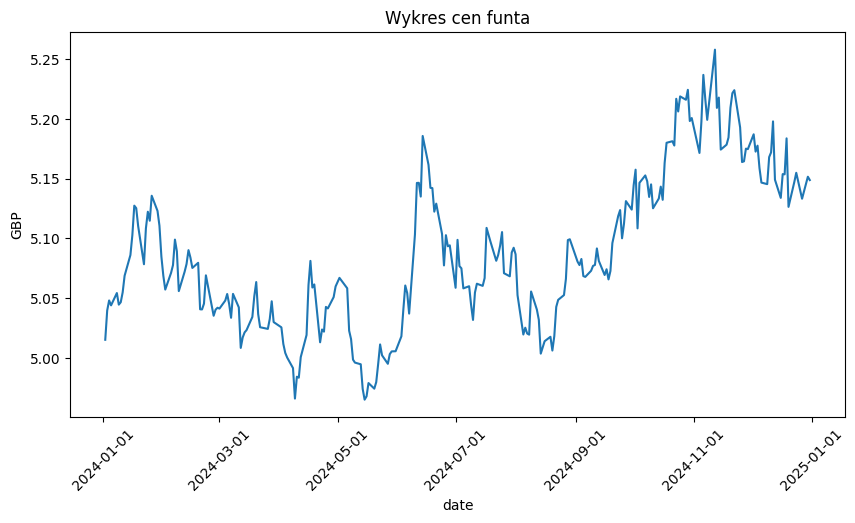

In [16]:
import matplotlib.dates as mdates
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="date", y="GBP")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres cen funta")
plt.show()

In [17]:
df["returns_USD"] = np.log(1 + df["USD"].pct_change())
df["returns_EUR"] = np.log(1 + df["EUR"].pct_change())
df["returns_GBP"] = np.log(1 + df["GBP"].pct_change())

In [18]:
df.dropna(inplace=True)

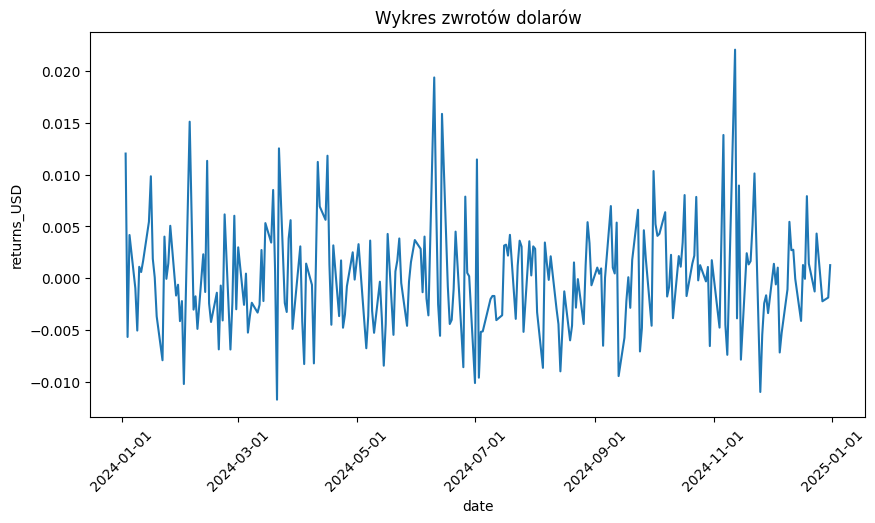

In [19]:
import matplotlib.dates as mdates
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="date", y="returns_USD")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres zwrotów dolarów")
plt.show()

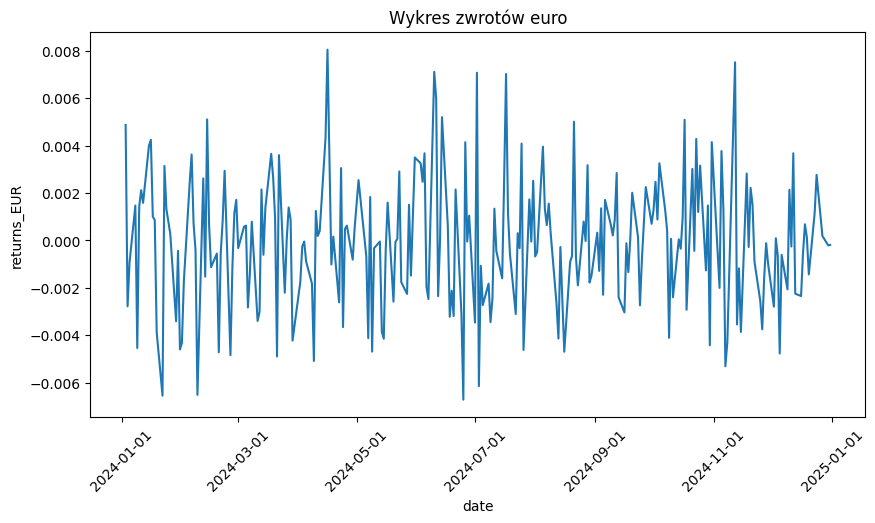

In [20]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="date", y="returns_EUR")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres zwrotów euro")
plt.show()

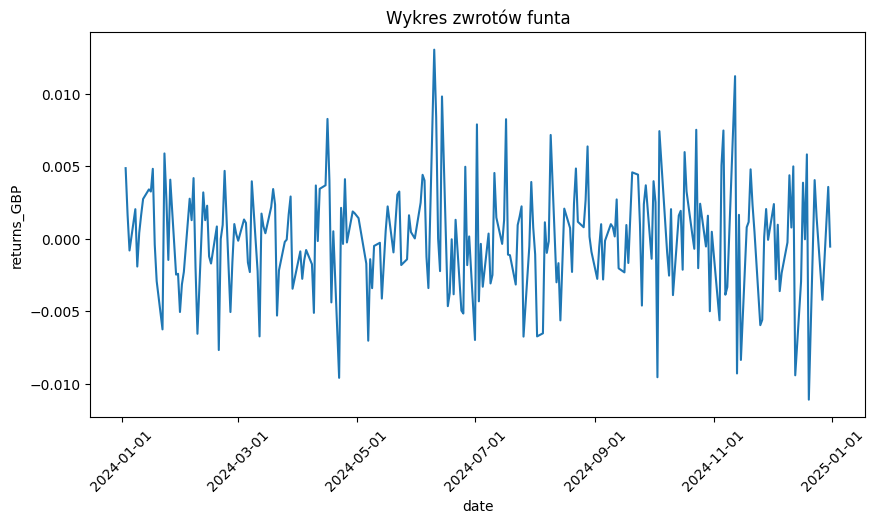

In [21]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="date", y="returns_GBP")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres zwrotów funta")
plt.show()

Odchylenie standardowe

In [22]:
usd_std = df["returns_USD"].std()
eur_std = df["returns_EUR"].std()
gbp_std = df["returns_GBP"].std()
print(usd_std, eur_std, gbp_std)

0.005295166530142576 0.002755891305820713 0.0037859002385859006


Wariancja

In [23]:
usd_var = df["returns_USD"].var()
eur_var = df["returns_EUR"].var()
gbp_var = df["returns_GBP"].var()
print(usd_var, eur_var, gbp_var)

2.8038788581942166e-05 7.594936889498194e-06 1.4333040616524778e-05


Annualizowane odchylenie standardowe

In [24]:
annualized_usd_std = usd_std * np.sqrt(252) * 100
annualized_eur_std = eur_std * np.sqrt(252) * 100
annualized_gbp_std = gbp_std * np.sqrt(252) * 100
print(f"Annualizowane std USD: {annualized_usd_std:.2f}%\nAnnualizowane std EUR: {annualized_eur_std:.2f}%\nAnnualizowane std GBP: {annualized_gbp_std:.2f}%")

Annualizowane std USD: 8.41%
Annualizowane std EUR: 4.37%
Annualizowane std GBP: 6.01%


Średnie

In [25]:
usd_mean = df["returns_USD"].mean()
eur_mean = df["returns_EUR"].mean()
gbp_mean = df["returns_GBP"].mean()
print(usd_mean, eur_mean, gbp_mean)

0.0001565220613735748 -6.510476049053974e-05 0.00010474253720440151


Semi std

In [26]:
below_mean_usd = df[df['returns_USD'] < usd_mean]
below_mean_eur = df[df['returns_EUR'] < eur_mean]
below_mean_gbp = df[df['returns_GBP'] < gbp_mean]

semi_std_usd = np.std(below_mean_usd['returns_USD'], ddof=1) * 100
semi_std_eur = np.std(below_mean_eur['returns_EUR'], ddof=1) * 100
semi_std_gbp = np.std(below_mean_gbp['returns_GBP'], ddof=1) * 100

print(f"Semi std USD: {semi_std_usd:.2f}%\nSemi std EUR: {semi_std_eur:.2f}%\nSemi std GBP: {semi_std_gbp:.2f}%")

Semi std USD: 0.27%
Semi std EUR: 0.17%
Semi std GBP: 0.25%


IQR

In [27]:
iqr_usd = df["returns_USD"].quantile(0.75) - df["returns_USD"].quantile(0.25)
iqr_eur = df["returns_EUR"].quantile(0.75) - df["returns_EUR"].quantile(0.25)
iqr_gbp = df["returns_GBP"].quantile(0.75) - df["returns_GBP"].quantile(0.25)

In [28]:
print(iqr_usd, iqr_eur, iqr_gbp)

0.006770388322919013 0.0034055934388662473 0.004557766405683919


Dekompozycja - nie trzeba stacjonarne

In [29]:
def adfuller_test(series, sig = 0.05):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 
    stats   = round(res[0], 3) 

    if p_value <= sig:
        print(f"Statystyka testowa = {stats}, p-Value = {p_value} => Stationary. ")
    else:
        print(f"Statystyka testowa = {stats}, p-value = {p_value} => Non-stationary.")

In [30]:
adfuller_test(df["returns_USD"])
adfuller_test(df["returns_EUR"])
adfuller_test(df["returns_GBP"])

Statystyka testowa = -16.901, p-Value = 0.0 => Stationary. 
Statystyka testowa = -16.036, p-Value = 0.0 => Stationary. 
Statystyka testowa = -17.269, p-Value = 0.0 => Stationary. 


Histogramy

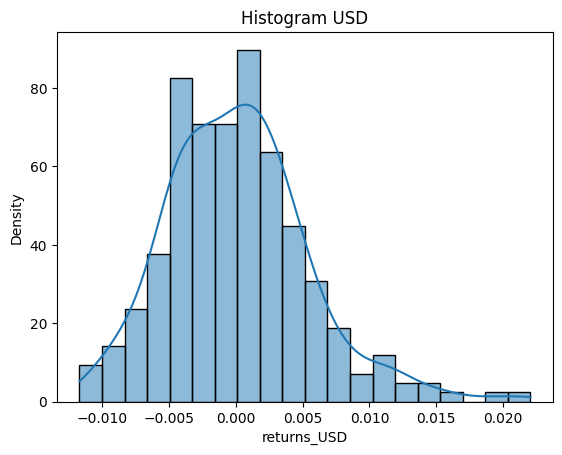

In [31]:
sns.histplot(data=df, x="returns_USD", stat="density",kde = True, bins=20)
plt.title("Histogram USD")
plt.show()

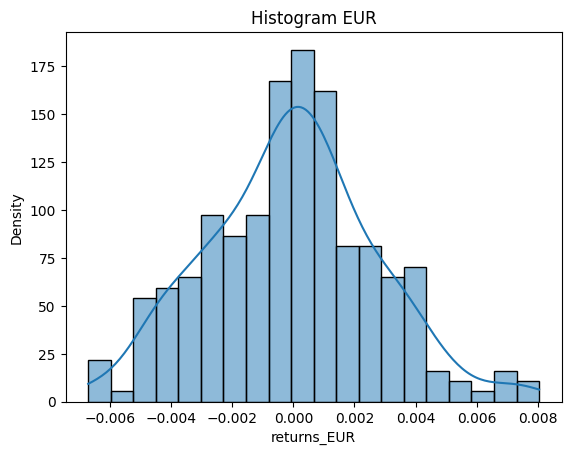

In [32]:
sns.histplot(data=df, x="returns_EUR", stat="density",kde = True, bins=20)
plt.title("Histogram EUR")
plt.show()

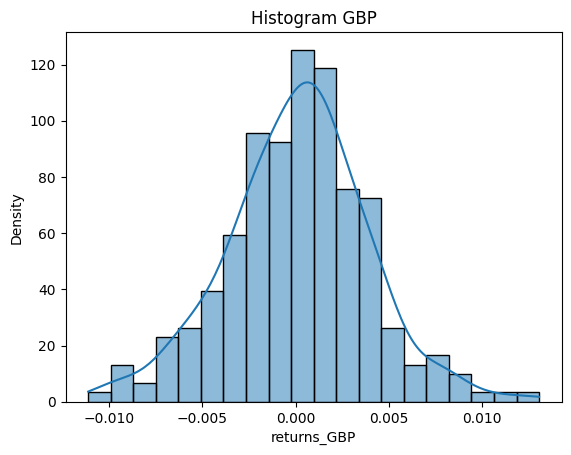

In [33]:
sns.histplot(data=df, x="returns_GBP", stat="density",kde = True, bins=20)
plt.title("Histogram GBP")
plt.show()

Kwantyle

In [34]:
quantiles = [0.05, 0.5, 0.95, 0.975]
result = df[["returns_USD", "returns_EUR", "returns_GBP"]].quantile(q=quantiles)
result = result.T
result.columns = [f"Q{int(q*1000)/10}" for q in quantiles]
print(result)

                 Q5.0     Q50.0     Q95.0     Q97.5
returns_USD -0.007871 -0.000050  0.009973  0.011973
returns_EUR -0.004606 -0.000046  0.004260  0.005175
returns_GBP -0.006549  0.000251  0.005937  0.007803


Dystrybuanty

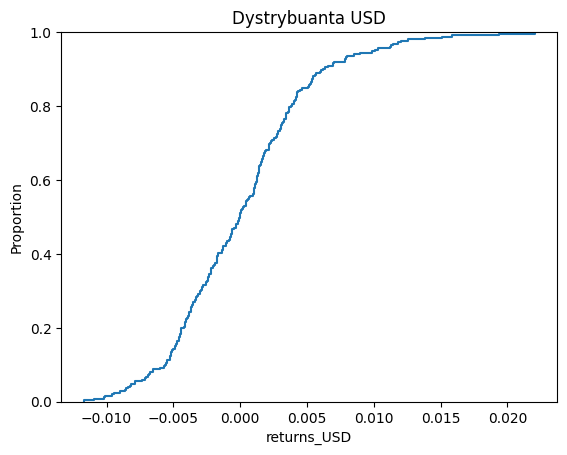

In [35]:
sns.ecdfplot(data=df, x="returns_USD")
plt.title("Dystrybuanta USD")
plt.show()

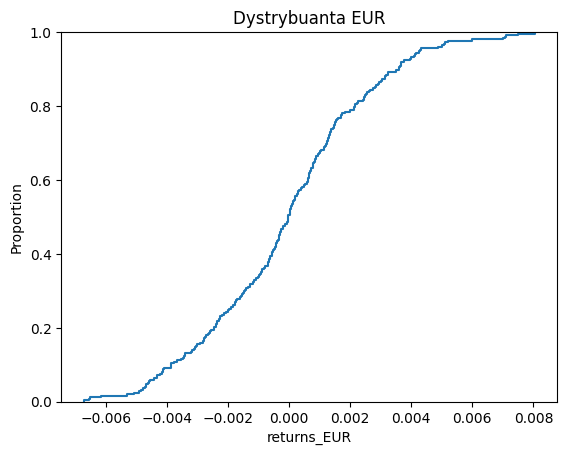

In [36]:
sns.ecdfplot(data=df, x="returns_EUR")
plt.title("Dystrybuanta EUR")
plt.show()

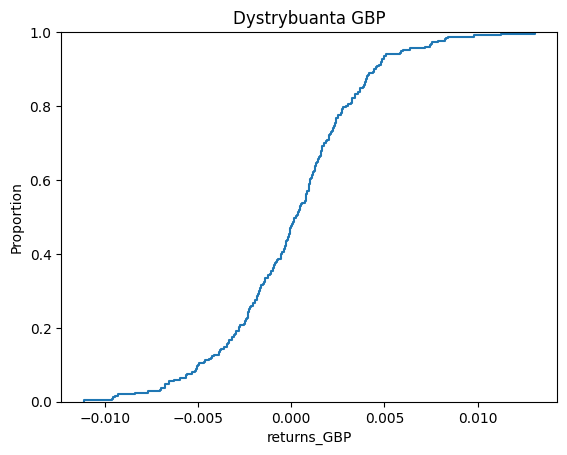

In [37]:
sns.ecdfplot(data=df, x="returns_GBP")
plt.title("Dystrybuanta GBP")
plt.show()

In [60]:
thresholds = [-0.01, -0.005, 0, 0.005, 0.01]
cdf_result = pd.DataFrame(index=thresholds)

for col in ["returns_USD", "returns_EUR", "returns_GBP"]:
    cdf_result[col] = [ (df[col] <= t).mean() for t in thresholds ]

cdf_result = cdf_result.T
cdf_result.columns = [f"F({t})" for t in thresholds]

print(cdf_result)


             F(-0.01)  F(-0.005)      F(0)  F(0.005)   F(0.01)
returns_USD  0.015936   0.143426  0.509960  0.848606  0.948207
returns_EUR  0.000000   0.023904  0.505976  0.960159  1.000000
returns_GBP  0.003984   0.099602  0.474104  0.936255  0.992032


# Zadanie 2

Wagi portfolio - proporcjonalne do zmienności, risk-parity light

In [38]:
inv_vol_usd = 1 / usd_std
inv_vol_eur = 1 / eur_std

w_usd = inv_vol_usd / (inv_vol_usd + inv_vol_eur)
w_eur = inv_vol_eur / (inv_vol_usd + inv_vol_eur)

In [39]:
print(w_usd, w_eur)

0.34230176480790087 0.6576982351920992


In [40]:
w_usd = 0.08
w_eur = 0.37
w_gbp = 0.55

Portfel

In [41]:
df["portfolio"] = w_usd * df["returns_USD"] + w_eur * df["returns_EUR"] + w_gbp * df["returns_GBP"]


Macierz korelacji

In [42]:
df[["returns_USD", "returns_EUR", "returns_GBP", "portfolio"]].corr()

,returns_USD,returns_EUR,returns_GBP,portfolio
returns_USD,1.000000,0.723848,0.669365,0.792303
returns_EUR,0.723848,1.000000,0.716376,0.873686
returns_GBP,0.669365,0.716376,1.000000,0.959966
portfolio,0.792303,0.873686,0.959966,1.000000


Odchylenie standardowe portfela

In [43]:
portf_std = df["portfolio"].std()

print(portf_std)

0.0032253949641585953


Wariancja portfela

In [44]:
portf_var = df["portfolio"].var()

print(portf_var)

1.0403172674819627e-05


Annualizowane odchylenie standardowe portfela

In [45]:
annualized_portf_std = portf_std * np.sqrt(252) * 100
print(f"Annualizowane std portfela: {annualized_portf_std:.2f}%")

Annualizowane std portfela: 5.12%


Średnia portfela

In [46]:
portf_mean = df["portfolio"].mean()

print(portf_mean)

4.604139899080708e-05


Semi std portfela

In [47]:
below_mean_portf = df[df['portfolio'] < portf_mean]

semi_std_portf = np.std(below_mean_portf['portfolio'], ddof=1) * 100

print(f"Semi std portfela: {semi_std_portf:.2f}%")

Semi std portfela: 0.19%


IQR portfela

In [48]:
iqr_portf = df["portfolio"].quantile(0.75) - df["portfolio"].quantile(0.25)
print(iqr_portf)

0.003958107929713383


Stacjonarność portfela

In [49]:
adfuller_test(df["portfolio"])

Statystyka testowa = -16.761, p-Value = 0.0 => Stationary. 


Histogram portfela

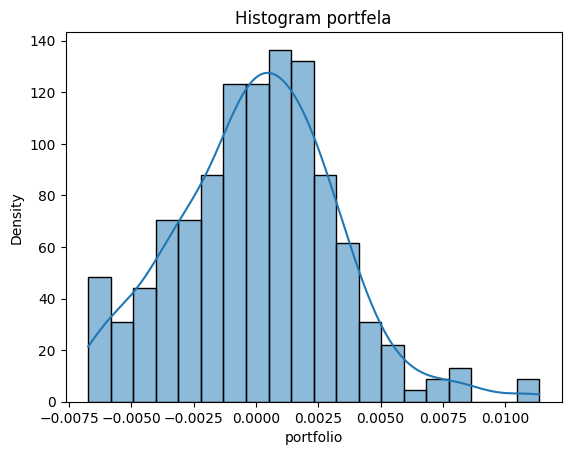

In [50]:
sns.histplot(data=df, x="portfolio", stat="density", kde = True, bins=20)
plt.title("Histogram portfela")
plt.show()

Kwantyle portfela

In [51]:
quantiles = [0.05, 0.5, 0.95, 0.975]
result_portf = df["portfolio"].quantile(q=quantiles)
result_portf = result_portf.T
result_portf.columns = [f"Q{int(q*1000)/10}" for q in quantiles]
print(result_portf)

0.050   -0.005541
0.500    0.000150
0.950    0.005004
0.975    0.007134
Name: portfolio, dtype: float64


Dystrybuanta portfela

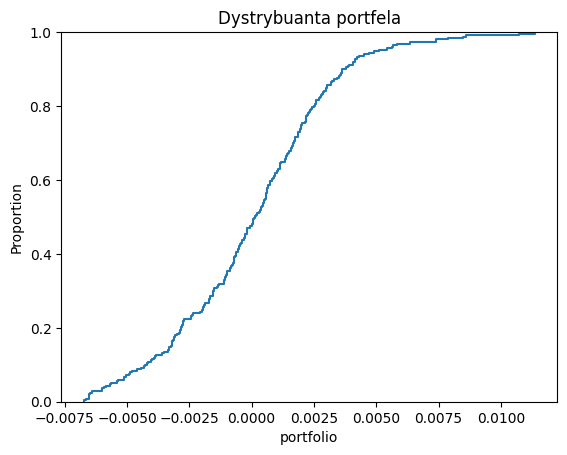

In [52]:
sns.ecdfplot(data=df, x="portfolio")
plt.title("Dystrybuanta portfela")
plt.show()

In [58]:
cdf_portfolio = pd.Series({f"F({t})": (df["portfolio"] <= t).mean() for t in thresholds}).to_frame().T

print(cdf_portfolio)

   F(-0.01)  F(-0.005)      F(0)  F(0.005)   F(0.01)
0       0.0   0.071713  0.474104  0.948207  0.992032


Dystrybuanty dwuwymiarowe

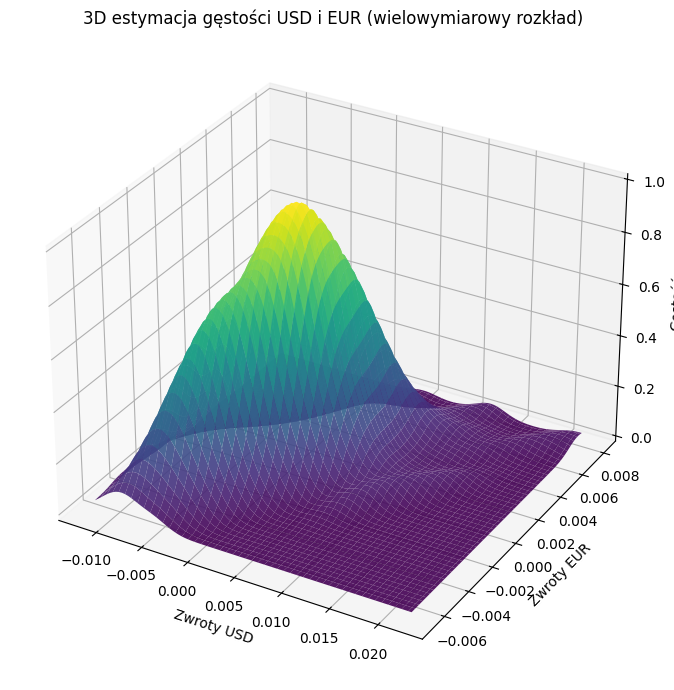

In [53]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

X = df[["returns_USD", "returns_EUR"]].dropna().to_numpy().T

kde = gaussian_kde(X)

x_min, x_max = df["returns_USD"].min(), df["returns_USD"].max()
y_min, y_max = df["returns_EUR"].min(), df["returns_EUR"].max()

x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
positions = np.vstack([x.ravel(), y.ravel()])

z = kde(positions).reshape(x.shape)
z = z / z.max()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.9)

ax.set_xlabel("Zwroty USD")
ax.set_ylabel("Zwroty EUR")
ax.set_zlabel("Gęstość")
ax.set_title("3D estymacja gęstości USD i EUR (wielowymiarowy rozkład)")

plt.tight_layout()
plt.show()

In [62]:
x_thresh = [-0.01, -0.005, 0, 0.005, 0.01] 
y_thresh = [-0.01, -0.005, 0, 0.005, 0.01] 

cdf_matrix = np.zeros((len(x_thresh), len(y_thresh)))

for i, a in enumerate(x_thresh):
    for j, b in enumerate(y_thresh):
        cdf_matrix[i, j] = ((df["returns_USD"] <= a) & (df["returns_EUR"] <= b)).mean()

cdf_df = pd.DataFrame(cdf_matrix, index=[f"USD ≤ {round(a, 4)}" for a in x_thresh],
                                     columns=[f"EUR ≤ {round(b, 4)}" for b in y_thresh])

print(cdf_df)


              EUR ≤ -0.01  EUR ≤ -0.005   EUR ≤ 0  EUR ≤ 0.005  EUR ≤ 0.01
USD ≤ -0.01           0.0      0.000000  0.015936     0.015936    0.015936
USD ≤ -0.005          0.0      0.015936  0.135458     0.143426    0.143426
USD ≤ 0               0.0      0.023904  0.398406     0.509960    0.509960
USD ≤ 0.005           0.0      0.023904  0.498008     0.840637    0.848606
USD ≤ 0.01            0.0      0.023904  0.501992     0.932271    0.948207


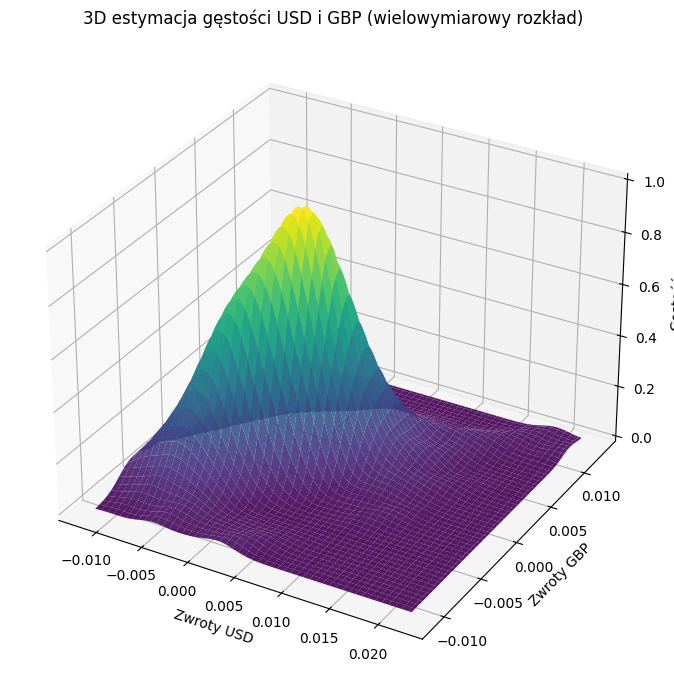

In [54]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

X = df[["returns_USD", "returns_GBP"]].dropna().to_numpy().T

kde = gaussian_kde(X)

x_min, x_max = df["returns_USD"].min(), df["returns_USD"].max()
y_min, y_max = df["returns_GBP"].min(), df["returns_GBP"].max()

x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
positions = np.vstack([x.ravel(), y.ravel()])

z = kde(positions).reshape(x.shape)
z = z / z.max()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.9)

ax.set_xlabel("Zwroty USD")
ax.set_ylabel("Zwroty GBP")
ax.set_zlabel("Gęstość")
ax.set_title("3D estymacja gęstości USD i GBP (wielowymiarowy rozkład)")

plt.tight_layout()
plt.show()

In [63]:
x_thresh = [-0.01, -0.005, 0, 0.005, 0.01] 
y_thresh = [-0.01, -0.005, 0, 0.005, 0.01] 

cdf_matrix = np.zeros((len(x_thresh), len(y_thresh)))

for i, a in enumerate(x_thresh):
    for j, b in enumerate(y_thresh):
        cdf_matrix[i, j] = ((df["returns_USD"] <= a) & (df["returns_GBP"] <= b)).mean()

cdf_df = pd.DataFrame(cdf_matrix, index=[f"USD ≤ {round(a, 4)}" for a in x_thresh],
                                     columns=[f"GBP ≤ {round(b, 4)}" for b in y_thresh])

print(cdf_df)


              GBP ≤ -0.01  GBP ≤ -0.005   GBP ≤ 0  GBP ≤ 0.005  GBP ≤ 0.01
USD ≤ -0.01      0.000000      0.011952  0.015936     0.015936    0.015936
USD ≤ -0.005     0.000000      0.055777  0.131474     0.143426    0.143426
USD ≤ 0          0.000000      0.091633  0.378486     0.509960    0.509960
USD ≤ 0.005      0.003984      0.099602  0.466135     0.828685    0.848606
USD ≤ 0.01       0.003984      0.099602  0.466135     0.908367    0.948207


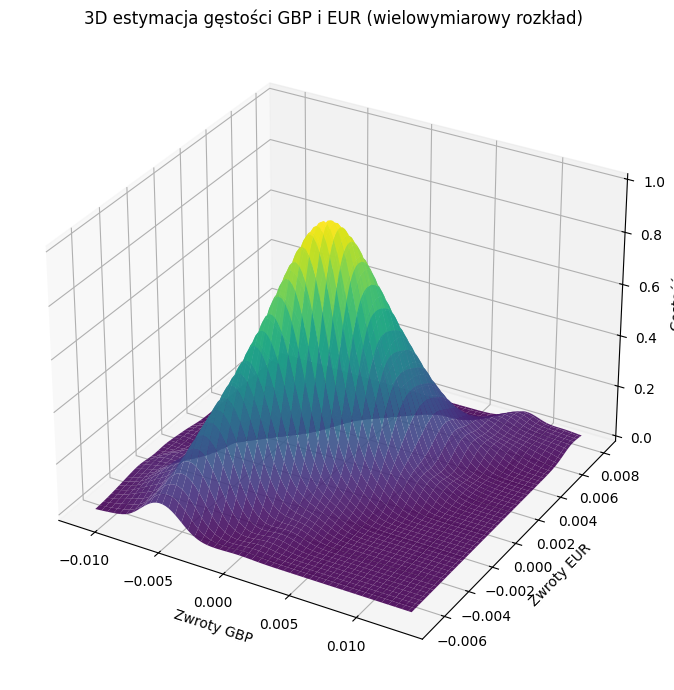

In [55]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

X = df[["returns_GBP", "returns_EUR"]].dropna().to_numpy().T

kde = gaussian_kde(X)

x_min, x_max = df["returns_GBP"].min(), df["returns_GBP"].max()
y_min, y_max = df["returns_EUR"].min(), df["returns_EUR"].max()

x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
positions = np.vstack([x.ravel(), y.ravel()])

z = kde(positions).reshape(x.shape)
z = z / z.max()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.9)

ax.set_xlabel("Zwroty GBP")
ax.set_ylabel("Zwroty EUR")
ax.set_zlabel("Gęstość")
ax.set_title("3D estymacja gęstości GBP i EUR (wielowymiarowy rozkład)")

plt.tight_layout()
plt.show()

In [64]:
x_thresh = [-0.01, -0.005, 0, 0.005, 0.01] 
y_thresh = [-0.01, -0.005, 0, 0.005, 0.01] 

cdf_matrix = np.zeros((len(x_thresh), len(y_thresh)))

for i, a in enumerate(x_thresh):
    for j, b in enumerate(y_thresh):
        cdf_matrix[i, j] = ((df["returns_EUR"] <= a) & (df["returns_GBP"] <= b)).mean()

cdf_df = pd.DataFrame(cdf_matrix, index=[f"EUR ≤ {round(a, 4)}" for a in x_thresh],
                                     columns=[f"GBP ≤ {round(b, 4)}" for b in y_thresh])

print(cdf_df)


              GBP ≤ -0.01  GBP ≤ -0.005   GBP ≤ 0  GBP ≤ 0.005  GBP ≤ 0.01
EUR ≤ -0.01      0.000000      0.000000  0.000000     0.000000    0.000000
EUR ≤ -0.005     0.000000      0.015936  0.023904     0.023904    0.023904
EUR ≤ 0          0.003984      0.091633  0.374502     0.505976    0.505976
EUR ≤ 0.005      0.003984      0.099602  0.474104     0.928287    0.960159
EUR ≤ 0.01       0.003984      0.099602  0.474104     0.936255    0.992032
